In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator
import matplotlib.dates as mdates

In [34]:
dis_stocks = pd.read_csv('datasets/disney_stocks.csv', index_col = 0)
dis_stocks = dis_stocks[~dis_stocks.apply(lambda row: row.astype(str).str.contains('Dividend', na=False)).any(axis=1)]
dis_stocks['Date'] = pd.to_datetime(dis_stocks['Date'])
dis_stocks.set_index('Date', inplace=True)
dis_stocks['Open'] = pd.to_numeric(dis_stocks['Open'], errors='coerce')
dis_stocks['Open'].max()

200.19

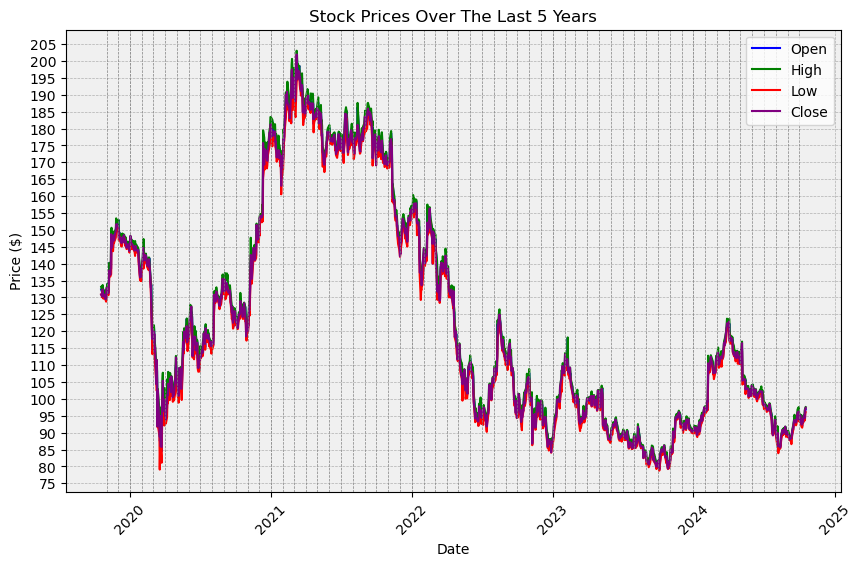

In [41]:
# Plot each column overlaid
plt.figure(figsize=(10, 6))
plt.plot(dis_stocks.index, dis_stocks['Open'], label='Open', color='blue')
plt.plot(dis_stocks.index, dis_stocks['High'], label='High', color='green')
plt.plot(dis_stocks.index, dis_stocks['Low'], label='Low', color='red')
plt.plot(dis_stocks.index, dis_stocks['Close'], label='Close', color='purple')

# Add grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f0f0f0')  # Light gray background
# Add vertical lines at the beginning of each month
for month in pd.date_range(dis_stocks.index.min(), dis_stocks.index.max(), freq='MS'):
    plt.axvline(month, color='gray', linestyle='--', linewidth=0.5)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Stock Prices Over The Last 5 Years')
plt.legend()
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MultipleLocator(5))


# Show the plot
plt.show()

In [44]:
all_stocks = pd.read_csv('datasets/all_disney_stocks.csv', index_col = 0)
all_stocks = all_stocks[~all_stocks.apply(lambda row: row.astype(str).str.contains('Dividend', na=False)).any(axis=1)]
all_stocks['Date'] = pd.to_datetime(all_stocks['Date'])
all_stocks.set_index('Date', inplace=True)
all_stocks['Open'] = pd.to_numeric(all_stocks['Open'], errors='coerce')
all_stocks.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-08,0.09,0.10,0.09,0.09,0.06,"1,282,984"
1962-01-05,0.09,0.09,0.09,0.09,0.06,"962,238"
1962-01-04,0.09,0.09,0.09,0.09,0.06,"962,238"
1962-01-03,0.09,0.09,0.09,0.09,0.06,"801,865"
1962-01-02,0.09,0.10,0.09,0.09,0.06,"841,958"


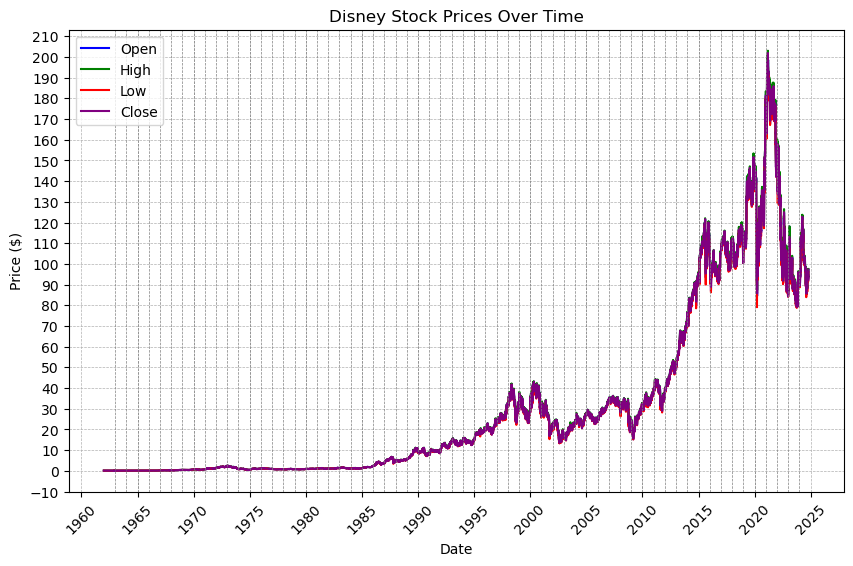

In [61]:
# Plot each column overlaid
plt.figure(figsize=(10, 6))
plt.plot(all_stocks.index, all_stocks['Open'], label='Open', color='blue')
plt.plot(all_stocks.index, all_stocks['High'], label='High', color='green')
plt.plot(all_stocks.index, all_stocks['Low'], label='Low', color='red')
plt.plot(all_stocks.index, all_stocks['Close'], label='Close', color='purple')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Disney Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Major grid lines only

for year in pd.date_range(all_stocks.index.min(), all_stocks.index.max(), freq='YS'):
    plt.axvline(year, color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

Box Office Mojo Data Viz